## http://rgl.epfl.ch/publications/Nicolet2021Large Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 13
x = np.linspace(-1,1,n).reshape(n,1)

#combinatorial laplacian (eq. 6)
L = np.eye(n)
L[np.arange(1,n-1),np.arange(1,n-1)] = 2
L[np.arange(1,n),np.arange(0,n-1)] = -1
L[np.arange(0,n-1),np.arange(1,n)] = -1

#sum of squared silhouette distances
Phi = (x[0]-(-.5))**2 + (x[-1]-(+.5))**2

#Phi' (blue plot, "Gradient step 1" in paper)
Phi1 = np.zeros((n,1))
Phi1[0] = 2*(x[0]-(-.5))
Phi1[-1] = 2*(x[-1]-(+.5))

#Phi''
Phi2 = np.zeros((n,n))
Phi2[0,0] = Phi2[-1,-1] = 2

## 3.2 Regularization (Eq. 11, orange plot)

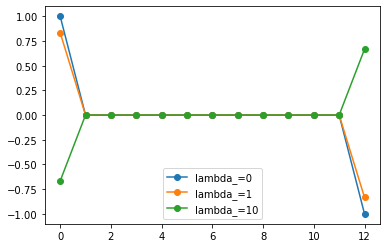

In [4]:
for lambda_ in [0,1,10]:
    delta_x = -Phi1+lambda_*L@x
    plt.plot(delta_x,'-o',label=f'{lambda_=}')
plt.legend()

## 3.3 Second-order Optimization (Eq. 12)

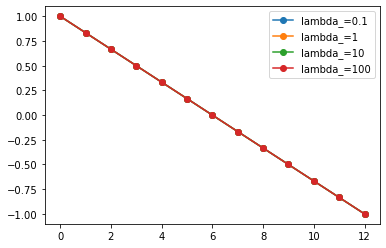

In [5]:
for lambda_ in [.1,1,10,100]:
    delta_x=-np.linalg.solve(Phi2+lambda_*L, Phi1+lambda_*L@x)
    plt.plot(delta_x/delta_x[0],'-o',label=f'{lambda_=}')
plt.legend()

## 3.4 Modified Gradient Descent (Eq. 14)

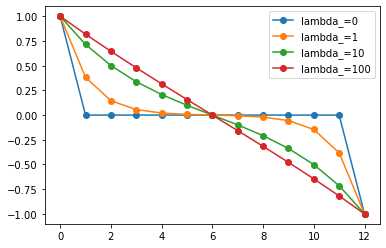

In [6]:
for lambda_ in [0,1,10,100]:
    delta_x=-np.linalg.solve(np.eye(n)+lambda_*L, Phi1)
    plt.plot(delta_x/delta_x[0],'-o',label=f'{lambda_=}')
plt.legend()